In [41]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [42]:
data=pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\5\Hw5\Q2-part1.csv')

In [43]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
# preprocessing
# loading dataset
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [45]:
x=data['Level'].values
y=data['Salary'].values

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
# y_test,x_true

In [48]:
y_true=y_test.copy()
x_true=x_test.copy()

In [49]:
scalar=MinMaxScaler()
y_train=scalar.fit_transform(y_train.reshape(-1, 1))
y_test=scalar.transform(y_test.reshape(-1, 1))

In [50]:
x_train,x_test
x_train.shape,y_train.shape

((7,), (7, 1))

In [51]:
#using Support vector regression

pipe_svr = Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVR(kernel = 'linear'))]) 
parameteres_svr = {'SVM__C':[1,3,0.7], 'SVM__gamma':[0.1,1,0.01]
              ,'SVM__epsilon':[0.05,0.01]}
model_SVR = GridSearchCV(pipe_svr, param_grid=parameteres_svr, cv=2)

model_SVR.fit(x_train.reshape(-1, 1), y_train.ravel())

print ('R squared metric for the model is:',model_SVR.score(x_test.reshape(-1,1),y_test))
print ('best parameters of the model are:',model_SVR.best_params_)

R squared metric for the model is: 0.7264617489628267
best parameters of the model are: {'SVM__C': 0.7, 'SVM__epsilon': 0.01, 'SVM__gamma': 0.1}


In [52]:
y_pred1=model_SVR.predict(x_test.reshape(-1,1))
y_pred=scalar.inverse_transform(y_pred1.reshape(-1,1))

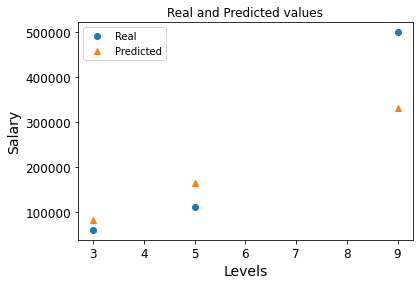

In [53]:
plt.figure()
a=np.random.randint(1,500,20)   #generate 20 random test numbersto show
plt.plot(x_true,y_true,'o',label='Real')
plt.plot(x_true,y_pred,'^',label='Predicted')
plt.title('Real and Predicted values')
plt.ylabel('Salary')
plt.xlabel('Levels')
plt.legend()

In [54]:
y_pred2=model_SVR.predict(x.reshape(-1,1))
y_pred3=scalar.inverse_transform(y_pred2.reshape(-1,1))
from sklearn.metrics import mean_squared_error,mean_absolute_error


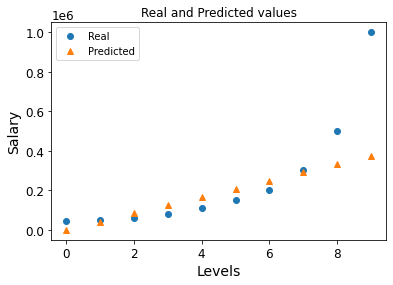

In [55]:
plt.figure()
plt.plot(y,'o',label='Real')
plt.plot(y_pred3,'^',label='Predicted')
plt.title('Real and Predicted values')
plt.ylabel('Salary')
plt.xlabel('Levels')
plt.legend()
# plt.ylim([0,55000])